Problem 1 - Data Read, Write and Inspect:
Complete all following Task:
• Data
d the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object
(b) unique values of those columns.
(c) check for the total number of null values in each column.
3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”
4. Read ”banknumericdata.csv” and Find the summary statistics.

In [28]:
#Ques1
#Import pandas in DataFrame and load the dataset
import pandas as pd

df1 = pd.read_csv('/content/drive/MyDrive/Datasets-20241208T023532Z-001/Datasets/bank .csv')
pd.DataFrame(df1)



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [29]:
#Ques2

#Check info of dataframe
print("DataFrame Information:")
print(df1.info())

# Identify columns with dtype=object
object_columns = df1.select_dtypes(include='object').columns
print("\nColumns with dtype object are:")
print(object_columns)

#Unique values of those columns
print("\nUnique values of the object columns are:")
for col in object_columns:
    print(f"{col}: {df1[col].unique()}")

#Total num of null values in each column
print("\n Total null values in each column are:")
# .isnull() returns df1 object with bool values if null ->1 else ->0 ani .sum() adds all values in each col
print(df1.isnull().sum())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None

Columns with dtype object are:
Index(['job', 'marital', 'education', '

In [30]:
#Ques3

# Drop all the columns with dtype=object
numeric_df1 = df1.drop(columns=object_columns)

# Save numeric DataFrame to CSV
numeric_df1.to_csv("banknumericdata.csv", index=False)
print("\nNumeric DataFrame saved to 'banknumericdata.csv'.")



Numeric DataFrame saved to 'banknumericdata.csv'.


In [31]:
#Ques4

# Read "banknumericdata.csv" file
numeric_df1 = pd.read_csv("banknumericdata.csv")

# Calculate summary statistics
summary_statistics = numeric_df1.describe()
print("\nSummary statistics of numeric data:")
print(summary_statistics)


Summary statistics of numeric data:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0

Problem 2 - Data Imputations:
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [32]:
#Ques1
#Import pandas in DataFrame and load the dataset
import pandas as pd

df2 = pd.read_csv('/content/drive/MyDrive/Datasets-20241208T023532Z-001/Datasets/medical_students_dataset.csv')
pd.DataFrame(df2)

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


In [33]:
#Ques2
#Check info of the DataSet
print("Dataset Information:")
print(df2.info())

# Identify columns with missing values
null_values = df2.isnull().sum()
print("\nColumns with null values:")
print(null_values)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None

Columns with null values:
Student ID        20000
Age               20000
Gender            20000
Height            200

In [ ]:
#Ques3
def fill_null_values(df2, col):
    if df2[col].dtype in ['int64', 'float64']:
        # For numerical column, median method is used in order to resist outliers present in the dataset
        fill_value = df2[col].median()
        print(f"Filling numerical column '{col}' with median: {fill_value}")
        df2[col] = df2[col].fillna(fill_value)
    else:
        #For categorical column,mode is used as it represents the most common value
        fill_value = df2[col].mode()[0]
        print(f"Filling categorical column '{col}' with mode: {fill_value}")
        df2[col] = df2[col].fillna(fill_value)

# Apply the function to all columns with missing values
for col in df2.columns[df2.isnull().any()]:
    fill_null_values(df2, col)




Filling numerical column 'Student ID' with median: 49943.5
Filling numerical column 'Age' with median: 26.0
Filling categorical column 'Gender' with mode: Male
Filling numerical column 'Height' with median: 174.8999141442403
Filling numerical column 'Weight' with median: 69.9793837798508
Filling categorical column 'Blood Type' with mode: B
Filling numerical column 'BMI' with median: 22.671401449817218
Filling numerical column 'Temperature' with median: 98.5996537029178
Filling numerical column 'Heart Rate' with median: 80.0
Filling numerical column 'Blood Pressure' with median: 115.0
Filling numerical column 'Cholesterol' with median: 184.0
Filling categorical column 'Diabetes' with mode: No
Filling categorical column 'Smoking' with mode: No


In [35]:
#Ques4
# Check for duplicates
duplicate_count = df2.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

# Drop duplicate rows if any exist
df2_cleaned = df2.drop_duplicates()

# Display the cleaned DataFrame
print("\nDataFrame after removing duplicates:")
print(df2_cleaned.head())



Number of duplicate rows: 12879

DataFrame after removing duplicates:
   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0  26.0    Male  152.069157  47.630941          B  22.671401   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3     49943.5  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female  174.899914  46.234173          O  22.671401   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0    98.599654        95.0           109.0        203.0       No      No  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0           115.0        231.0       No      No  


Dataset Used: "titanic.csv"

Problem - 1:

Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [36]:
#Ques1
#Load the dataset
import pandas as pd

df3 = pd.read_csv('/content/drive/MyDrive/Datasets-20241208T023532Z-001/Datasets/Titanic-Dataset.csv')
pd.DataFrame(df3)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [37]:
#Ques1
#Create a subsetted dataframe
subset_df = df3[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Retainig rows where Pclass==1
first_class_df = subset_df[subset_df['Pclass'] == 1]

#Calculate mean,median,max value and min value
mean_fare = first_class_df['Fare'].mean()
median_fare = first_class_df['Fare'].median()
max_fare = first_class_df['Fare'].max()
min_fare = first_class_df['Fare'].min()

#Print them
print(f"Mean of Fare column: {mean_fare}")
print(f"Median of Fare column: {median_fare}")
print(f"Maximum value of Fare column: {max_fare}")
print(f"Minimum value of Fare column: {min_fare}")

Mean of Fare column: 84.1546875
Median of Fare column: 60.287499999999994
Maximum value of Fare column: 512.3292
Minimum value of Fare column: 0.0


Problem - 2:

How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [38]:
#Display total null values in subsetted dataset
print("Total null values in Age Column: ",first_class_df['Age'].isnull().sum())

#Dropping null values from dataframe
first_class_df_cleaned = first_class_df.dropna(subset=['Age'])

print(f"Total number of rows after dropping null values: {first_class_df_cleaned.shape[0]}")


Total null values in Age Column:  30
Total number of rows after dropping null values: 186


Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [39]:
#QuesNum1
#One-hot encoding the 'Embarked' column
df3_encoded = pd.get_dummies(df3['Embarked'], prefix='Embarked')

#QuesNum2
# Add the new columns to the original DataFrame
df3 = pd.concat([df3, df3_encoded], axis=1)

#QuesNum3
#Drop the original 'Embarked' column
df3.drop('Embarked', axis=1, inplace=True)

#QuesNum4
#Print the first few rows of the modified DataFrame to verify the changes.
print(df3.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

Mean Survival Rates by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


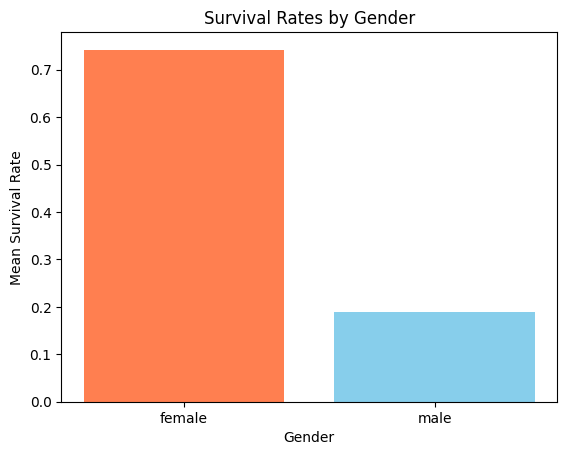

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

df2 = pd.read_csv("/content/drive/MyDrive/Datasets-20241208T023532Z-001/Datasets/Titanic-Dataset.csv")

survival_rates = df2.groupby('Sex')['Survived'].mean()

print("Mean Survival Rates by Gender:")
print(survival_rates)


genders = survival_rates.index
rates = survival_rates.values

plt.bar(genders, rates, color=['coral', 'skyblue'])
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Survival Rate')
plt.show()

Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

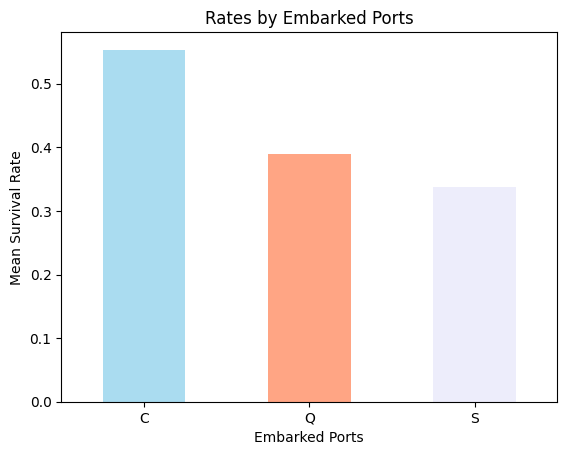

In [45]:

#Problem 5
import pandas as pd
import matplotlib.pyplot as plt


df2 = df2[df2['Embarked'].isin(['C', 'Q', 'S'])]

survival_embarked = df2.groupby('Embarked')['Survived'].mean()
survival_embarked.plot(kind='bar', stacked=True, color=['skyblue', 'coral', 'lavender'], alpha=0.7)

plt.title('Rates by Embarked Ports')
plt.xlabel('Embarked Ports')
plt.ylabel('Mean Survival Rate')
plt.xticks(rotation=0)
plt.show()